<a href="https://colab.research.google.com/github/lblogan14/python_data_analysis/blob/master/Chapter12_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt

#The Digits Dataset
consists of 1797 images that are 8x8 pixels in size in grayscale

In [0]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

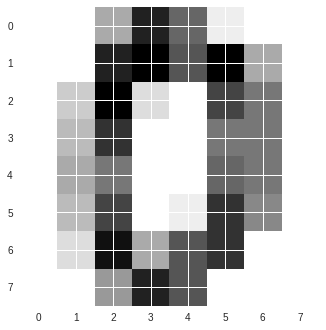

In [7]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

See in details,

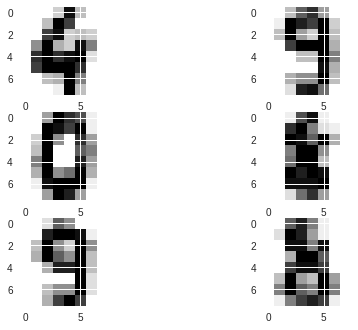

In [13]:
plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r, interpolation='nearest')

#Learning and Predicting
Use the SVC from sklearn.svm

In [14]:
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(digits.data[1:1790], digits.target[1:1790])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
svc.predict(digits.data[1790:])

array([8, 4, 9, 0, 8, 9, 8])

In [16]:
digits.target[1790:]

array([8, 4, 9, 0, 8, 9, 8])

#Recongnizing Handwritten Digits with TensorFlow
Import the MNIST dataset from **tensorflow.contrib.learn.python.learn.datasets.mnist** 

To load the dataset in a variable, use the **read_data_sets()** function.

In [18]:
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
mnist = read_data_sets('MNIST_data/', one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


##Learning and Predicting

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 1.176176388
Epoch: 0002 cost= 0.662609774
Epoch: 0003 cost= 0.550691562
Epoch: 0004 cost= 0.496835408
Epoch: 0005 cost= 0.463743265
Epoch: 0006 cost= 0.440955397
Epoch: 0007 cost= 0.423955021
Epoch: 0008 cost= 0.410661019
Epoch: 0009 cost= 0.399921168
Epoch: 0010 cost= 0.390976734
Epoch: 0011 cost= 0.383363760
Epoch: 0012 cost= 0.376775539
Epoch: 0013 cost= 0.371022065
Epoch: 0014 cost= 0.365934958
Epoch: 0015 cost= 0.361400861
Epoch: 0016 cost= 0.357308182
Epoch: 0017 cost= 0.353529498
Epoch: 0018 cost= 0.350148208
Epoch: 0019 cost= 0.346990490
Epoch: 0020 cost= 0.344154223
Epoch: 0021 cost= 0.341487641
Epoch: 0022 cost= 0.339020885
Epoch: 0023 cost= 0.336678400
Epoch: 0024 cost= 0.334474189
Epoch: 0025 cost= 0.33247

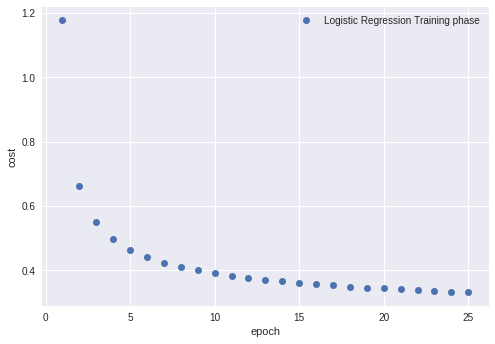

In [19]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

import tensorflow as tf
import matplotlib.pyplot as plt

# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

#tf Graph Input
x = tf.placeholder('float', [None, 28*28]) #mnist data image of shape 28*28
y = tf.placeholder('float', [None, 10]) # 0-9 digits recognition = 10 classes

''' Create model '''
# set model weights and bias
W = tf.Variable(tf.zeros([28*28, 10]))
b = tf.Variable(tf.zeros([10]))

evidence = tf.matmul(x, W) + b
#construct model
activation = tf.nn.softmax(evidence) #softmax
#minimize error using cross-entropy
cross_entropy = y*tf.log(activation)
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy, reduction_indices=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

#Plot settings
avg_set = []
epoch_set = []

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
  sess.run(init)
  
  # Training cycle
  for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(mnist.train.num_examples/batch_size)
    
    # Loop over all batches
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      sess.run(optimizer, feed_dict={x:batch_xs, y:batch_ys})
      avg_cost += sess.run(cost, feed_dict={x:batch_xs, y:batch_ys}) /total_batch
    
    if epoch % display_step == 0:
      print('Epoch:', '%04d' % (epoch+1), 'cost=', '{:.9f}'.format(avg_cost))
    
    avg_set.append(avg_cost)
    epoch_set.append(epoch+1)
    
  print('Training phase finished')
  
  plt.plot(epoch_set, avg_set, 'o', label='Logistic Regression Training phase')
  plt.xlabel('epoch')
  plt.ylabel('cost')
  plt.legend()
  
  # Test model
  correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
  # Calculate Accuracy
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
  print('Model accuracy:', accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))